In [1]:
#1 Importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
#2 Importing the data set
dataset = pd.read_csv('beer_data.csv')

#Printing first 10 rows of the dataset
print("\n",'-'*40,"\n",dataset.head(10))


 ---------------------------------------- 
    ABV  Ratings Cellar Temperature  Score
0  7.5        1              40-45   4.08
1  5.3       22              40-45   3.82
2  9.0        1              45-50   4.03
3  4.6        1              35-40   4.00
4  6.9        1              45-50   3.75
5  7.9       32              40-45   4.26
6  4.7      141              35-40   3.47
7  5.6        1              40-45   3.70
8  5.0        1              40-45   3.90
9  5.4       12              40-45   3.79


In [3]:
#3 Dealing with the categorical data

#spliting Cellar Temperature into Maximum and Minimum based on the given data and converting the type from str to int
dataset['Minimum_Cellar_Temp'] = dataset['Cellar Temperature'].apply(lambda x : int(x.split('-')[0].strip()))
dataset['Maximum_Cellar_Temp'] = dataset['Cellar Temperature'].apply(lambda x : int(x.split('-')[1].strip()))

#New dataset with selected features
dataset = dataset[['ABV', 'Ratings','Minimum_Cellar_Temp','Maximum_Cellar_Temp', 'Score']]

#Printing first 10 rows of the dataset
print("\n----------------------------\n",dataset.head(10))

#Printing the summary of the dataset
print("\n----------------------------\n")
print(dataset.info())


----------------------------
    ABV  Ratings  Minimum_Cellar_Temp  Maximum_Cellar_Temp  Score
0  7.5        1                   40                   45   4.08
1  5.3       22                   40                   45   3.82
2  9.0        1                   45                   50   4.03
3  4.6        1                   35                   40   4.00
4  6.9        1                   45                   50   3.75
5  7.9       32                   40                   45   4.26
6  4.7      141                   35                   40   3.47
7  5.6        1                   40                   45   3.70
8  5.0        1                   40                   45   3.90
9  5.4       12                   40                   45   3.79

----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 5 columns):
ABV                    1631 non-null float64
Ratings                1631 non-null int64
Minimum_Cellar_Temp    1631 n

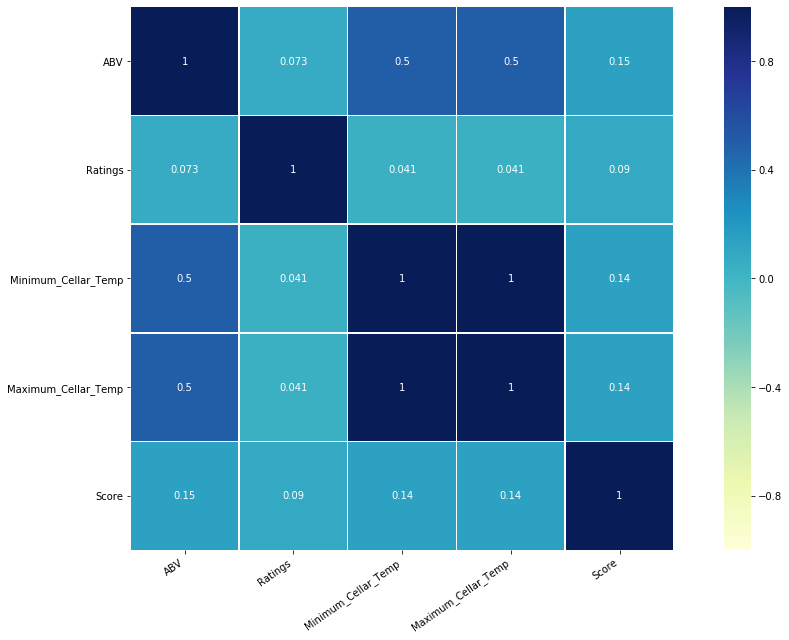

In [30]:
#A simple correlation plot using seaborn. The below plot shows how the different variables correlate with each other
import seaborn as sns
import matplotlib.pyplot as plt

corr = dataset.corr()
fig, ax = plt.subplots(figsize=(18,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    square=True,
    annot=True,
    linewidths=.5,
    cmap="YlGnBu" )

#Rotating labels on x axis
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=35,
    horizontalalignment='right'
)

#Rotating labels on x axis
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0
)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [31]:
#4 Classifying dependent and independent variables

#All columns except the last column are independent features- (Selecting every column except Score)
X = dataset.iloc[:,:-1].values

#Only the last column is the dependent feature or the target variable(Score)
y = dataset.iloc[:,-1].values

In [32]:
#5 Creating training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#################Data Preprocessing Ends #################################

In [34]:
""" Multiple Linear regression """

#6 Creating the Regressor and training it with the training set

from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize = True)

In [35]:
#7 Feeding the data and training the model
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [38]:
#8 Predicting the Score for test set observations
y_pred = regressor.predict(X_test)

#printing the predictions
print("\n----------------------------\nPredictions = \n",y_pred)


----------------------------
Predictions = 
 [2.89362768 2.90755783 3.07058711 3.48413975 3.65433446 2.9310254
 3.12667115 2.90202462 3.11905124 3.1177165  3.13259288 3.13790974
 2.84802728 2.95505068 3.58824928 3.15091575 2.85489522 3.2262689
 3.13565087 3.184115   3.23524861 3.64880125 3.11084856 5.82687381
 3.37539607 3.53546761 3.54748025 3.08718673 3.12458445 3.27929496
 3.23944708 3.54100082 3.16387461 3.19384668 3.56883606 3.08031878
 3.38869332 3.2505135  2.98405145 3.05685121 3.14538254 3.14972514
 3.13259288 3.26844786 3.23391387 3.2241822  4.24094226 3.7083318
 3.08451725 3.67646729 3.57475778 3.1177165  3.21864899 2.91576051
 3.23381064 3.14538254 3.15511422 3.17858179 3.20071463 3.12189289
 3.30031237 3.25031924 3.25604671 3.16618064 2.88675973 3.4108733
 3.61980047 3.15758944 2.9666748  6.49031035 3.39274468 2.96822886
 3.06791763 3.54080656 2.96002618 3.16331691 3.1121833  3.01936247
 3.22799215 3.13984934 3.10186884 3.26364155 3.44832413 3.73313411
 3.41640651 2.910979

In [39]:

#9 Calculating score from Root Mean Log Squared Error

def rmlse(y_test, y_pred):
    error = np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean() ** 0.5
    score = 1 - error
    return error, score

error, score = rmlse(y_test, y_pred)

print("\n",'-'*40)
print("RMLSE : ", error)
print("Score : ", score)


 ----------------------------------------
RMLSE :  0.23371046561588427
Score :  0.7662895343841157
